In [379]:
#text processment imports
import nltk
import re
import string
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
#df imports
import pandas as pd
import numpy as np
#a.i. imports
import tensorflow as tf
from tensorflow.keras.callbacks import Callback
#system imports
import os
from os import path
from PIL import Image
#other imports
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import warnings
warnings.filterwarnings(action='once')
import matplotlib.pyplot as plt
% matplotlib inline


print(f"Tensorflow Version: {tf.__version__}")

UsageError: Line magic function `%` not found.


In [312]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('rslp')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/valkiryan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/valkiryan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package rslp to /home/valkiryan/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

In [313]:
!git clone https://github.com/roneysco/Fake.br-Corpus
path = "./Fake.br-Corpus/size_normalized_texts"

fatal: destination path 'Fake.br-Corpus' already exists and is not an empty directory.


In [342]:
class ClearCallback(Callback):
    """ Handles the cleaning of the log during the training of a model. """

    def __init__(self, current_k, total_k):
        self._current_k = current_k
        self._total_k = total_k

    def on_epoch_end(self, epoch, logs=None):
        """ Clears the log. Called when a training epoch ends. """
        clear_output(wait=True)
        print("Running %d-folds cross-validation. Current fold: %d.\n" % (self._total_k, self._current_k))

In [314]:
def create_list_text(path):
    lista = []
    for i in sorted(os.listdir(path), key = lambda x: int(re.match("[0-9]+", x).group())):
        with open(os.path.join(path, i)) as file:
            lista.append(file.read())
    return lista

In [315]:
true = create_list_text(os.path.join(path, "true"))
fake = create_list_text(os.path.join(path, "fake"))
print(f"total true text: {len(true)}, total fake text: {len(fake)}")

total true text: 3600, total fake text: 3600


In [316]:
df = pd.DataFrame([{"text": t, "label": 0} for t in true] + 
                  [{"text": t, "label": 1} for t in fake]).sample(frac = 1)

In [317]:
df

,text,label
4542,Dezenas de africanos invadem a fronteira da Espanha. Um guarda tentou impedir o grupo e quebrou a perna. . \n,1
1959,MP faz nova perícia e constata interferência na gravação das imagens do dia de suposta agressão a Garotinho. Peritos identificaram que três câmera...,0
1742,"Quarta-feira, 21 de fevereiro de 2018. Boa noite! Aqui estão as principais notícias para você terminar o dia bem-informado. Já sob intervenção fed...",0
2546,Obras da Odebrecht foram superfaturadas em mais de R$ 3 bilhões no RJ. Veja o rombo em 10 das maiores construções no estado citadas nas delações d...,0
4356,"Morre, aos 65 anos, o apresentador Marcelo Rezende. Marcelo Rezende hoje (16/9) aos 65 anos. O jornalista morreu às 17h45 deste sábado (16), em ...",1
...,...,...
6911,"Que país é esse?. Por falta de um avião da FAB, perdeu-se a vida de uma criança que precisava fazer transplante de coração. Gabriel tinha 12 an...",1
1512,O desafio de quem quer definir seu próprio destino. Cinco jovens relatam como quebraram o ciclo de limitações e violência imposto às suas mães e a...,0
1661,"PT de Minas entra com representação contra procurador de Justiça por frase morre logo, peste!, sobre Marisa Letícia. Em agosto, Rômulo Paiva Filho...",0
85,"Escolhida para o Ministério do Trabalho foi citada em delação da Odebrecht Leandro Andrade, ligado à empreiteira, relatou à Lava Jato repasse de R...",0


In [318]:
pd.set_option("max_colwidth", 150)

In [319]:
df

,text,label
4542,Dezenas de africanos invadem a fronteira da Espanha. Um guarda tentou impedir o grupo e quebrou a perna. . \n,1
1959,MP faz nova perícia e constata interferência na gravação das imagens do dia de suposta agressão a Garotinho. Peritos identificaram que três câmera...,0
1742,"Quarta-feira, 21 de fevereiro de 2018. Boa noite! Aqui estão as principais notícias para você terminar o dia bem-informado. Já sob intervenção fed...",0
2546,Obras da Odebrecht foram superfaturadas em mais de R$ 3 bilhões no RJ. Veja o rombo em 10 das maiores construções no estado citadas nas delações d...,0
4356,"Morre, aos 65 anos, o apresentador Marcelo Rezende. Marcelo Rezende hoje (16/9) aos 65 anos. O jornalista morreu às 17h45 deste sábado (16), em ...",1
...,...,...
6911,"Que país é esse?. Por falta de um avião da FAB, perdeu-se a vida de uma criança que precisava fazer transplante de coração. Gabriel tinha 12 an...",1
1512,O desafio de quem quer definir seu próprio destino. Cinco jovens relatam como quebraram o ciclo de limitações e violência imposto às suas mães e a...,0
1661,"PT de Minas entra com representação contra procurador de Justiça por frase morre logo, peste!, sobre Marisa Letícia. Em agosto, Rômulo Paiva Filho...",0
85,"Escolhida para o Ministério do Trabalho foi citada em delação da Odebrecht Leandro Andrade, ligado à empreiteira, relatou à Lava Jato repasse de R...",0


In [320]:
stop_words = nltk.corpus.stopwords.words("portuguese")

In [321]:
stemmer = nltk.stem.RSLPStemmer()

In [322]:
df

,text,label
4542,Dezenas de africanos invadem a fronteira da Espanha. Um guarda tentou impedir o grupo e quebrou a perna. . \n,1
1959,MP faz nova perícia e constata interferência na gravação das imagens do dia de suposta agressão a Garotinho. Peritos identificaram que três câmera...,0
1742,"Quarta-feira, 21 de fevereiro de 2018. Boa noite! Aqui estão as principais notícias para você terminar o dia bem-informado. Já sob intervenção fed...",0
2546,Obras da Odebrecht foram superfaturadas em mais de R$ 3 bilhões no RJ. Veja o rombo em 10 das maiores construções no estado citadas nas delações d...,0
4356,"Morre, aos 65 anos, o apresentador Marcelo Rezende. Marcelo Rezende hoje (16/9) aos 65 anos. O jornalista morreu às 17h45 deste sábado (16), em ...",1
...,...,...
6911,"Que país é esse?. Por falta de um avião da FAB, perdeu-se a vida de uma criança que precisava fazer transplante de coração. Gabriel tinha 12 an...",1
1512,O desafio de quem quer definir seu próprio destino. Cinco jovens relatam como quebraram o ciclo de limitações e violência imposto às suas mães e a...,0
1661,"PT de Minas entra com representação contra procurador de Justiça por frase morre logo, peste!, sobre Marisa Letícia. Em agosto, Rômulo Paiva Filho...",0
85,"Escolhida para o Ministério do Trabalho foi citada em delação da Odebrecht Leandro Andrade, ligado à empreiteira, relatou à Lava Jato repasse de R...",0


In [323]:
# def text_process(text):
#     """
#     Função responsavel por realizar o processamento do texto, utilizando a função remove_punctuation
#     e tokenizando o texto, retorna uma lista com tokens.
#     """
#     no_puncts = text.translate(str.maketrans('', '', string.punctuation))
#     tokens = word_tokenize(text)

#     stop_words = set(stopwords.words('english'))  

#     word_tokens = tokens

#     filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]

#     filtered_sentence = []

#     for w in word_tokens:
#         if w not in stop_words:
#             filtered_sentence.append(w)

#     return str(filtered_sentence).strip("[]")

In [324]:
# df["tokens"] = df.apply(lambda x: text_process(x["text"]), axis = 1)

In [325]:
df

,text,label
4542,Dezenas de africanos invadem a fronteira da Espanha. Um guarda tentou impedir o grupo e quebrou a perna. . \n,1
1959,MP faz nova perícia e constata interferência na gravação das imagens do dia de suposta agressão a Garotinho. Peritos identificaram que três câmera...,0
1742,"Quarta-feira, 21 de fevereiro de 2018. Boa noite! Aqui estão as principais notícias para você terminar o dia bem-informado. Já sob intervenção fed...",0
2546,Obras da Odebrecht foram superfaturadas em mais de R$ 3 bilhões no RJ. Veja o rombo em 10 das maiores construções no estado citadas nas delações d...,0
4356,"Morre, aos 65 anos, o apresentador Marcelo Rezende. Marcelo Rezende hoje (16/9) aos 65 anos. O jornalista morreu às 17h45 deste sábado (16), em ...",1
...,...,...
6911,"Que país é esse?. Por falta de um avião da FAB, perdeu-se a vida de uma criança que precisava fazer transplante de coração. Gabriel tinha 12 an...",1
1512,O desafio de quem quer definir seu próprio destino. Cinco jovens relatam como quebraram o ciclo de limitações e violência imposto às suas mães e a...,0
1661,"PT de Minas entra com representação contra procurador de Justiça por frase morre logo, peste!, sobre Marisa Letícia. Em agosto, Rômulo Paiva Filho...",0
85,"Escolhida para o Ministério do Trabalho foi citada em delação da Odebrecht Leandro Andrade, ligado à empreiteira, relatou à Lava Jato repasse de R...",0


In [326]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [337]:
STOPWORDS = nltk.corpus.stopwords.words('portuguese')
STEMMER = nltk.stem.RSLPStemmer()

In [338]:
def normalize_texts(corpus, stem):
    processed_texts = []
    counter = 0
    for i, row in corpus.iterrows():
        clear_output(wait = True)
        print("[%.2f%%] Processing text %d of %d." % (100*(counter+1)/len(corpus), counter+1, len(corpus)))
        counter += 1
        
        text = " ".join( [   
                (w if not stem else STEMMER.stem(w)) 
                    for w in nltk.tokenize.word_tokenize(row["text"]) if w not in STOPWORDS and w not in string.punctuation
        ] )
        processed_texts.append({"text": text, "label": row["label"]})
    return pd.DataFrame(processed_texts)

norm_data = normalize_texts(df, stem=True)
norm_data


[100.00%] Processing text 7200 of 7200.


,text,label
0,dezen afric invad fronteir espanh um guard tent imped grup quebr pern,1
1,mp faz nov períc constat interfer grav imag dia supost agress garot perit identific trê câm presídi deslig imag congel ex-govern diss vai process ...,0
2,quarta-f 21 fever 2018 boa noit aqu princip notíc termin dia bem-inform já sob intervenç feder rio particip forç arm oper presídi japer ond rebel ...,0
3,obr odebrecht superfatur r 3 bilhã rj vej romb 10 mai construç est cit del ex-execu empreit atras som 35 ano .. as propin mostr apen pequen part e...,0
4,morr 65 ano apresent marcel rezend marcel rezend hoj 16/9 65 ano o jornal morr 17h45 dest sáb 16 são paul vítim fal múltipl órg consequ cânc infor...,1
...,...,...
7195,que país por falt avi fab perdeu-s vid crianç precis faz transpl coraçã gabriel 12 ano intern unidad terap intens uti hospit brasíl esper transpl ...,1
7196,o desafi qu defin própri destin cinc jov relat quebr cicl limit viol impost mão avó ela vêm cl soc difer têm sonh profiss pessoal divers comum lut...,0
7197,pt min entr represent contr procur justiç fras morr log pest sobr maris letíc em agost rômul paiv filh suger dar banh gasolin dilm rousseff tac fo...,0
7198,escolh minist trabalh cit del odebrecht leandr andrad lig empreit relat lav jat rep r 200 mil deput cristian brasil ptb-rj parlament diss époc dec...,0


In [343]:
# k-fold cross-validation
k = 10
folds = np.split(norm_data.sample(frac = 1), k)

accuracies = []
for i in range(len(folds)):
    # separating data
    test_data, test_labels = folds[i]["text"].values, folds[i]["label"].values
    training_data = np.concatenate( [folds[j]["text"].values for j in range(len(folds)) if j != i] )
    training_labels = np.concatenate( [folds[j]["label"].values for j in range(len(folds)) if j != i] )

    # extracting features
    vectorizer = CountVectorizer(max_features = 1000)
    training_data = vectorizer.fit_transform(training_data).toarray()
    test_data = vectorizer.transform(test_data).toarray() 

    # preparing model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(32, activation = "relu", kernel_regularizer=tf.keras.regularizers.l2(1e-3)),
        tf.keras.layers.Dense(1, activation = "sigmoid")
    ])
    model.compile(loss="binary_crossentropy",
                  optimizer=tf.keras.optimizers.Adam(1e-3),
                  metrics=["accuracy"])
    
    # training
    model.fit(training_data, training_labels, epochs = 50, 
              validation_data = (test_data, test_labels), 
              callbacks = [ClearCallback(i + 1, k)])
    
    # evaluating
    loss, acc = model.evaluate(test_data, test_labels)
    accuracies.append(acc)


 Cross-validation finished! Results:
 . Mean accuracy: 88.62%
 . Accuracies std: 0.78%


In [344]:
print("\n Cross-validation finished! Results:")
print(" . Mean accuracy: %.2f%%" % (100*np.mean(accuracies)))
print(" . Accuracies std: %.2f%%" % (100*np.std(accuracies)))


 Cross-validation finished! Results:
 . Mean accuracy: 88.62%
 . Accuracies std: 0.78%


In [362]:
preds = model.predict(test_data)

23/23 [==============================] - 0s 2ms/step


In [373]:
def create_wordCloud(df):
    text = df.text[0]

    # Create and generate a word cloud image:
    wordcloud = WordCloud().generate(text)

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

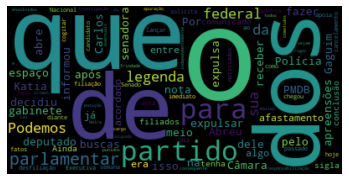

In [374]:
create_wordCloud(df)

In [380]:
from PIL import Image, ImageOps
like = np.array(Image.open("like.png"))
like

array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       ...,

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]], dtype=uint8)

In [385]:
unlike = np.array(Image.open("unlike.png"))
unlike

array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       ...,

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]], dtype=uint8)